# Loading data for source extraction

In this notebook we show how to load data for source extraction

## Setup plotting

In [1]:
%matplotlib inline
from thunder import Colorize
image = Colorize.image
import seaborn as sns
sns.set_context("poster")

## Load the images

For all the NEUROFINDER datasets, you can get the images, as well as the ground-truth sources. When running on just one machine, only grab a subset of the data by specifying a range of indices (say 0 through 100).

In [2]:
bucket = "s3n://neuro.datasets/"
path = "challenges/neurofinder/00.00/"
images = tsc.loadImages(bucket + path + 'images', recursive=True, startIdx=0, stopIdx=100)

In [3]:
images

Images
nrecords: 100
dtype: uint16
dims: min=(0, 0), max=(511, 511), count=(512, 512)

Cache the data set into memory to prevent reloading

In [4]:
images.cache()
images.count()

100

Look at both a single image and simple statistics (mean and standard deviation)

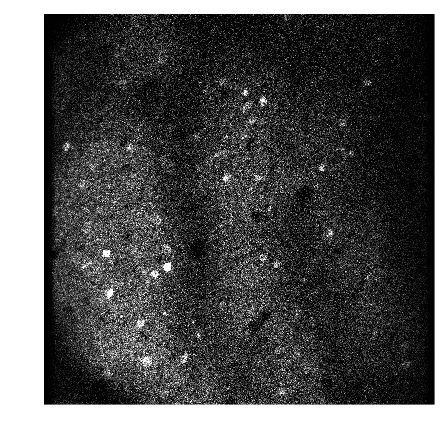

In [5]:
image(images[0], clim=(0, 1000))

In [6]:
im = images.mean()

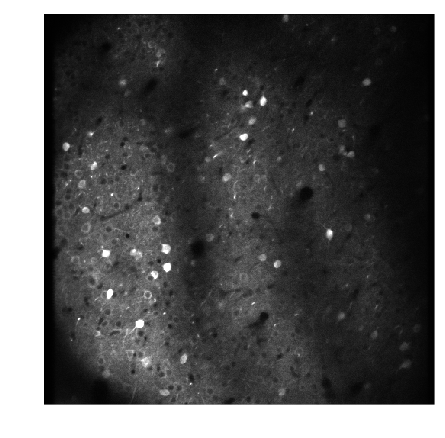

In [7]:
image(im, clim=(0, 1000))

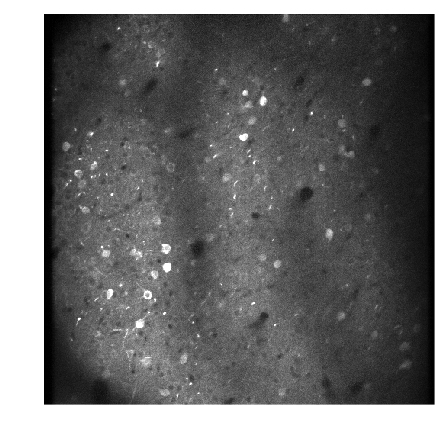

In [8]:
image(images.stdev(), clim=(0, 500))

## Load the sources

The sources are stored as a JSON file which we can load into a `SourceModel`

In [9]:
sources = tsc.loadSources(bucket + path + 'sources/sources.json')

In [10]:
sources

SourceModel
330 sources

The `masks` method makes it easy to view sources in a few different ways. You can look at them as regions

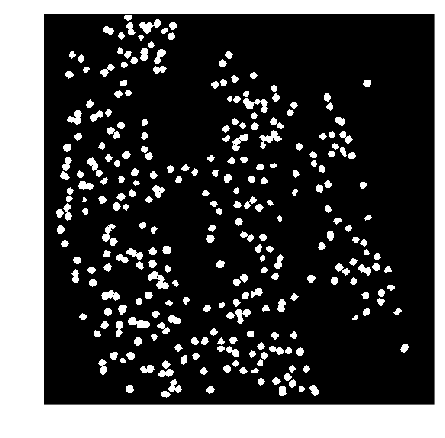

In [11]:
image(sources.masks((512,512)))

Or as outlines

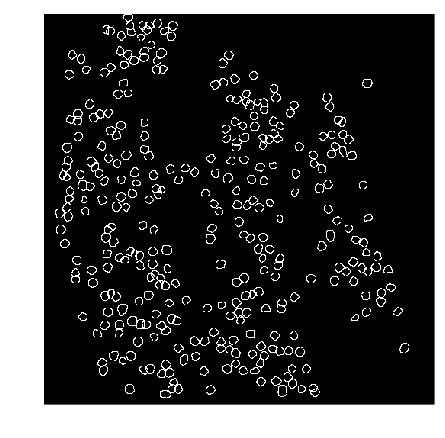

In [12]:
image(sources.masks((512,512), outline=True))

And optionally use random colors

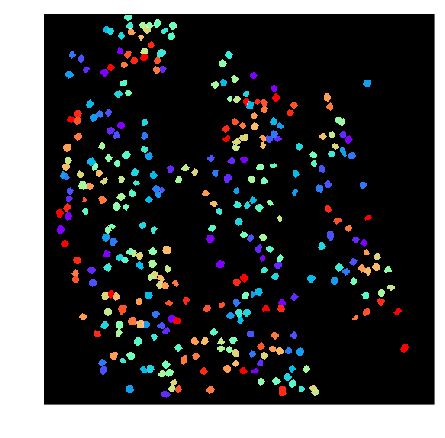

In [13]:
image(sources.masks((512,512), color='random'))

Or add a background

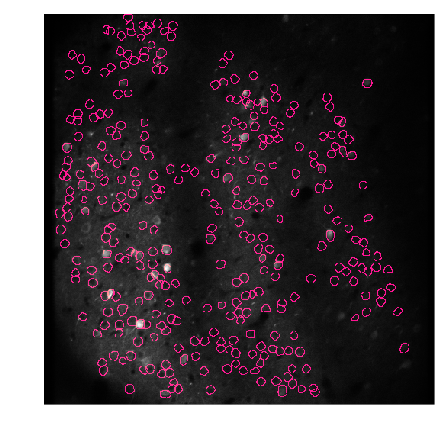

In [14]:
image(sources.masks((512,512), outline=True, base=im))

## Compare to a simple algorithm

Simply for demonstration, we'll compare the true sources to those estimated using a not-very-good algorithm (at least for these data).

In [15]:
from thunder import SourceExtraction

In [16]:
model = SourceExtraction('localmax', minDistance=5, maxSources=100, radius=5)
estimated = model.fit(images)

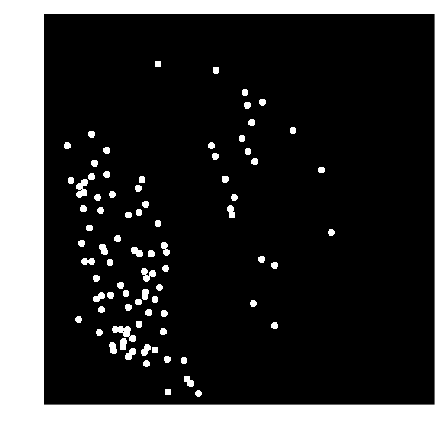

In [17]:
image(estimated.masks((512,512)))

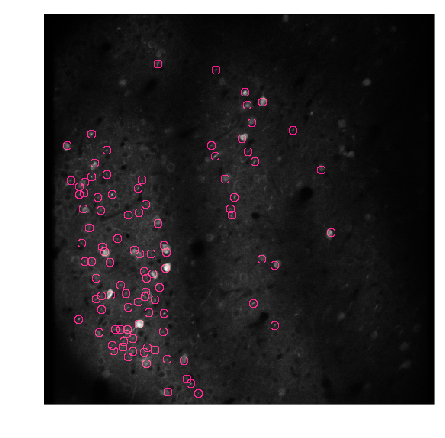

In [18]:
image(estimated.masks((512,512), base=im, outline=True))

You can display the estimated sources relative to a target set.

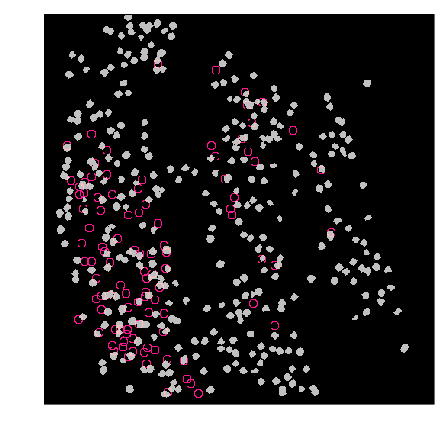

In [19]:
image(estimated.masks((512,512), base=sources, outline=True))

Compute statistics evaluating the quality

In [20]:
recall, precision, score = sources.similarity(estimated, metric='distance', minDistance=5)

In [21]:
print('recall: %.2f' % recall)
print('precision: %.2f' % precision)
print('score: %.2f' % score)

recall: 0.10
precision: 0.32
score: 0.15
